<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/CNN_for_binary_image_classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [ ]:
pip install -q tensorflow -gpu


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -g


In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Importing the dataset from Kaggle

In [ ]:
#Installing Kaggle API
!pip install -q kaggle


In [ ]:
# Create a directory named Kaggle
! mkdir -p ~/.kaggle

In [ ]:
# import API key to colab
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#copy API key to kaggle directory
!cp kaggle.json ~/.kaggle/

In [ ]:
#disable API key

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                    47KB  2023-08-26 11:04:57           9405        307  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)               210KB  2023-09-08 06:11:44           1718         51  1.0              
joebeachcapital/students-performance                       Students Performance                                 2KB  2023-08-31 00:50:11           3041         77  1.0              
iamsouravbanerjee/airline-dataset                          Airline Dataset                

In [ ]:
# importing the dataset
!kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:02<00:00, 110MB/s]
100% 218M/218M [00:02<00:00, 107MB/s]


In [ ]:
# unzip the dataset
!unzip -q  /content/cat-and-dog.zip

# Step 3: Building the Model

In [ ]:
# Creating an object (initializing CNN)
model = tf.keras.models.Sequential()


In [ ]:
# Adding first CNN model (input layer )
#1) filters =64
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu
#5) input_shape = (32, 32,3)

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32,32,3)))


In [ ]:
# Adding maxpool layer
#1) pool size = 2
#2) strides = 2
#3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size =(2,2), strides=2,padding = 'valid'))



In [ ]:
# Adding first CNN model (input layer )
#1) filters =128
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))

In [ ]:
# Adding maxpool layer
#1) pool size = 2
#2) strides = 2
#3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size =(2,2), strides=2,padding = 'valid'))

In [ ]:
# Adding flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Ignoring neurons is 30%
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding fully connected layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [ ]:
# Adding putput layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to Images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [ ]:
#rescale images
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32),
                                           classes = ['dogs', 'cats'], class_mode = 'binary',
                                           batch_size = 20)
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32),
                                       classes = ['dogs', 'cats'], class_mode = 'binary',
                                       batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
len(training_set), len(test_set)

(401, 102)

In [ ]:
len(training_set)*20, len(test_set)*20

(8020, 2040)

In [ ]:
history = model.fit_generator(generator = training_set, steps_per_epoch = 401, epochs = 15,
                    validation_data= test_set, validation_steps = 102)

<ipython-input-29-59f7c7f5e413>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = training_set, steps_per_epoch = 401, epochs = 15,


Epoch 1/15
401/401 [==============================] - 64s 154ms/step - loss: 0.6756 - accuracy: 0.5713 - val_loss: 0.6391 - val_accuracy: 0.6258
Epoch 2/15
401/401 [==============================] - 47s 117ms/step - loss: 0.6054 - accuracy: 0.6730 - val_loss: 0.5606 - val_accuracy: 0.7103
Epoch 3/15
401/401 [==============================] - 50s 124ms/step - loss: 0.5617 - accuracy: 0.7121 - val_loss: 0.5905 - val_accuracy: 0.6831
Epoch 4/15
401/401 [==============================] - 46s 116ms/step - loss: 0.5178 - accuracy: 0.7413 - val_loss: 0.5183 - val_accuracy: 0.7454
Epoch 5/15
401/401 [==============================] - 48s 120ms/step - loss: 0.4809 - accuracy: 0.7686 - val_loss: 0.5300 - val_accuracy: 0.7464
Epoch 6/15
401/401 [==============================] - 53s 133ms/step - loss: 0.4500 - accuracy: 0.7805 - val_loss: 0.4959 - val_accuracy: 0.7657
Epoch 7/15
401/401 [==============================] - 48s 120ms/step - loss: 0.4126 - accuracy: 0.8069 - val_loss: 0.5038 - val_ac

# Step 5: Plotting Learning Curve

In [33]:
def learning_curve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show


  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show

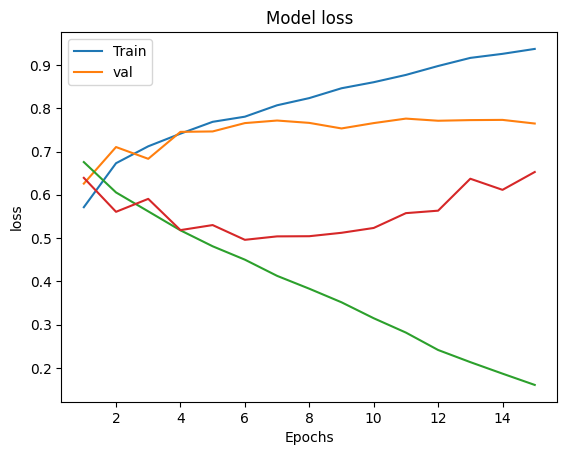

In [34]:
learning_curve(history, 15)